For this Project i used Bike Buyers Dataset a open Dataset from Heeral Dedhia in Kaggle
https://www.kaggle.com/heeraldedhia/bike-buyers


Bike Buyers Dataset for Exploratory Data Analysis
This dataset has details of 1000 users from different backgrounds and whether or not they buy a bike. This data can be used for prediction models using Machine Learning Algorithms. There are some NA values injected in the dataset. Use this dataset for Data Cleaning, Exploration and Visualization.

Columns:(ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike)

# Analyse for Ride a Bike

<font color='cyan'>**Presentation**</font> 

To analyse the collected data for our customer _Ride a Bike_ for their new ads's campaign , in Europe North America and Pacific . I firt try to explore the Data to ha ve a idea of what can we exploite and how can we make it . 

<font color='cyan'>**Import**</font> 

In this first step we will import the data shape and see the features

In [138]:
import pandas as pd

raw = pd.read_csv("bike_buyers.csv")
print(raw.shape)
raw.head(5)

(1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


<font color='cyan'>**Handling missing value**</font> 

Let's delete the missings values

In [124]:
print(f"We got max: {(raw.isnull().mean() * 100).sum()} % of missings rows")
raw.isnull().mean() * 100

We got max: 5.3 % of missings rows


ID                  0.0
Marital Status      0.7
Gender              1.1
Income              0.6
Children            0.8
Education           0.0
Occupation          0.0
Home Owner          0.4
Cars                0.9
Commute Distance    0.0
Region              0.0
Age                 0.8
Purchased Bike      0.0
dtype: float64

Because we have max 6 % of missings values it is not so critical deleting the nan values

In [125]:
df = raw.dropna()
print(f"We lose {( (raw.shape[0]-df.shape[0]) / raw.shape[0] ) * 100} % of datas")
df.shape

We lose 4.8 % of datas


(952, 13)

<font color='cyan'>**Overview of the finale dataset**</font> 

Let's delete the missings values

In [126]:
descrp = df["Purchased Bike"].describe()
print(f"{round(descrp[3]/descrp[0],2)} % of people didn't buy")
descrp

0.52 % of people didn't buy


count     952
unique      2
top        No
freq      496
Name: Purchased Bike, dtype: object

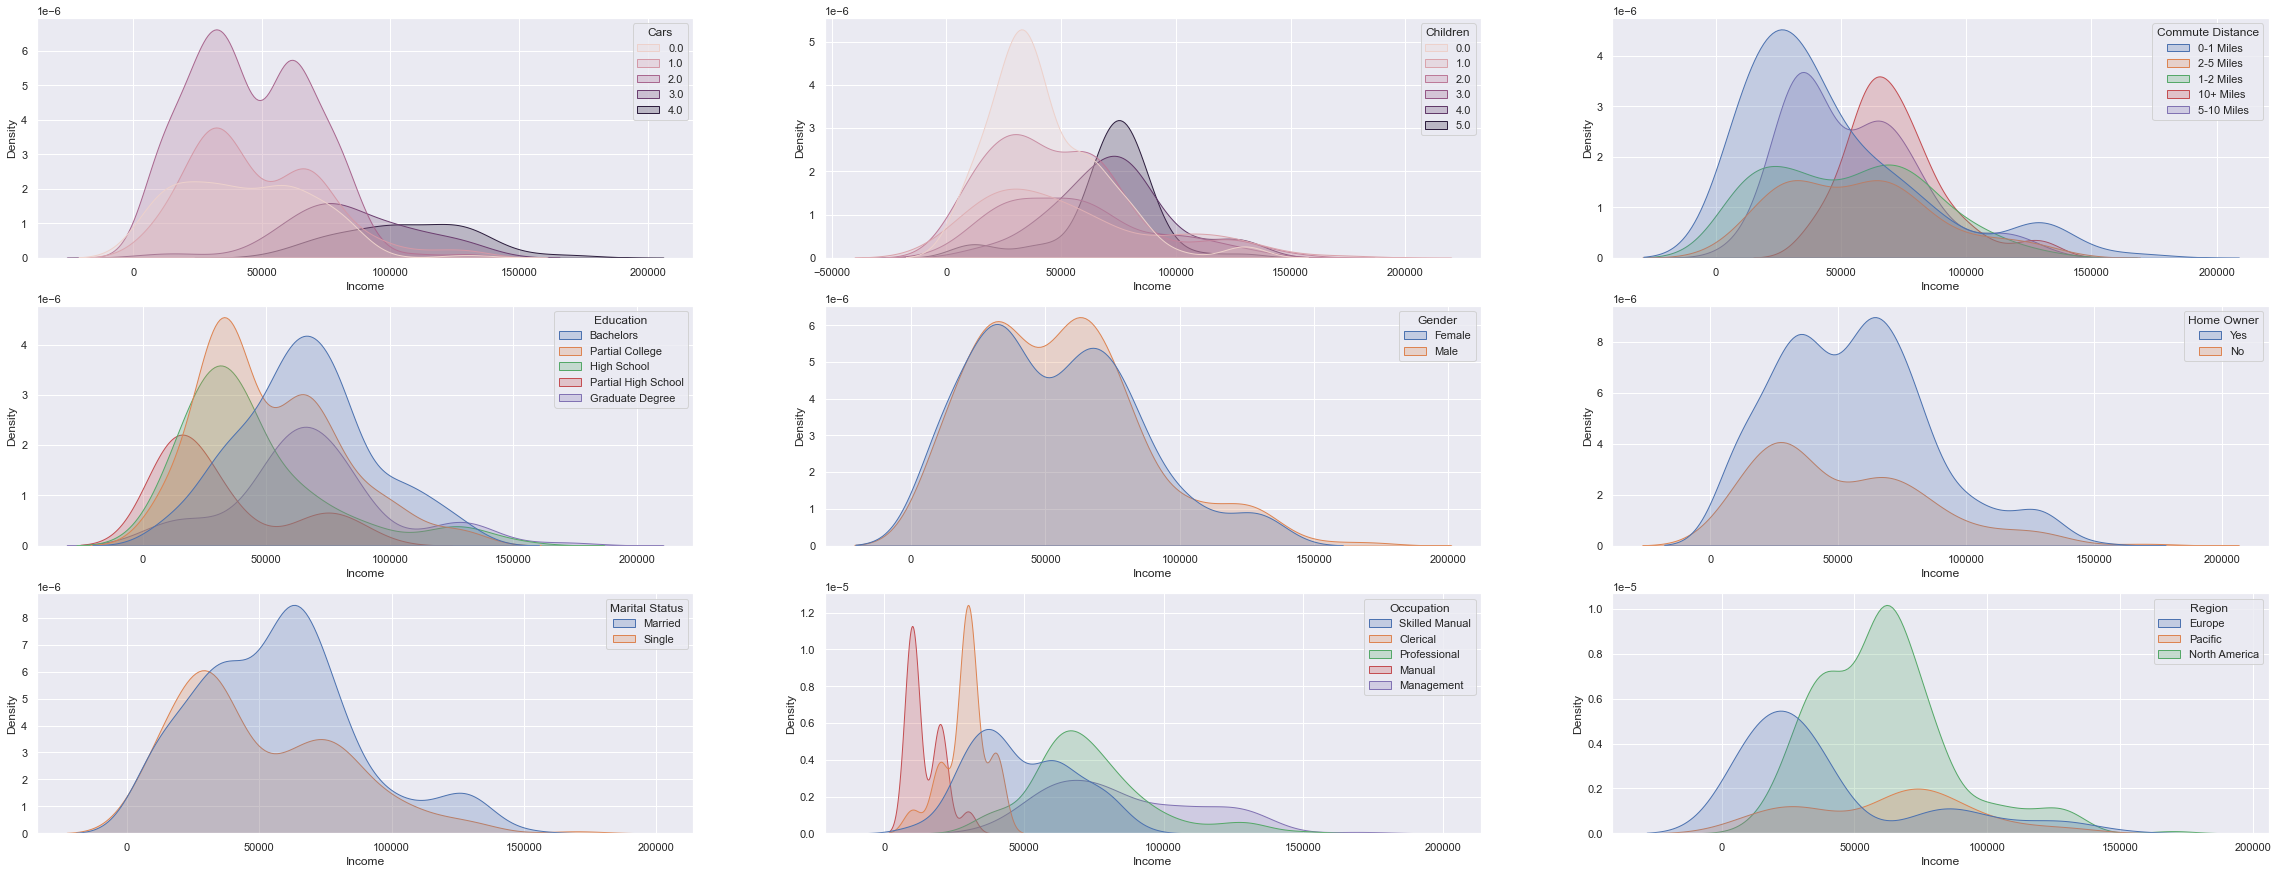

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns.difference(["Purchased Bike", "ID", "Age", "Income"])

# Sizing The Plot Size
sns.set_theme(style="dark")
sns.set(rc={"figure.figsize": (40, 15)})

# Using Matplotlib for Subploting
fig, axes = plt.subplots(round(len(features) / 3), 3)

# Subploting Data Showing Income According to other features
for num, i in enumerate(features):
    sns.kdeplot(
        data=df[df["Purchased Bike"] == "No"],
        x="Income",
        fill=True,
        hue=i,
        ax=axes[num // 3, num % 3],
    )

Here we can already notice that:
* <font color='pink'>Cars</font> : The most buyers have between 0 and 2 cars (That makes sense)
* <font color='pink'>Children</font> : The most buyers have less children (We can understand that family need more cars than bike)
* <font color='pink'>Commute Distance</font> : The most buyers have shorts comute distances (More the comute distance is important less you need a bike)
* <font color='pink'>Education</font> : Bachelors graded peoples buy more bike
* <font color='pink'>Gender & Marital status</font> : There is not a hudge difference in depends of gender either the marital status
* <font color='pink'>Home Owner</font> : Persons with own house buy more than persons without houses
* <font color='pink'>Occupation</font> : Here we can see that Proffessionals are the biggest group 
* <font color='pink'>Region</font> : North America peoples buy more bikes than the filiale in Europe and Pacific

Now let's see how is it with the income and age

<AxesSubplot:xlabel='Age', ylabel='Count'>

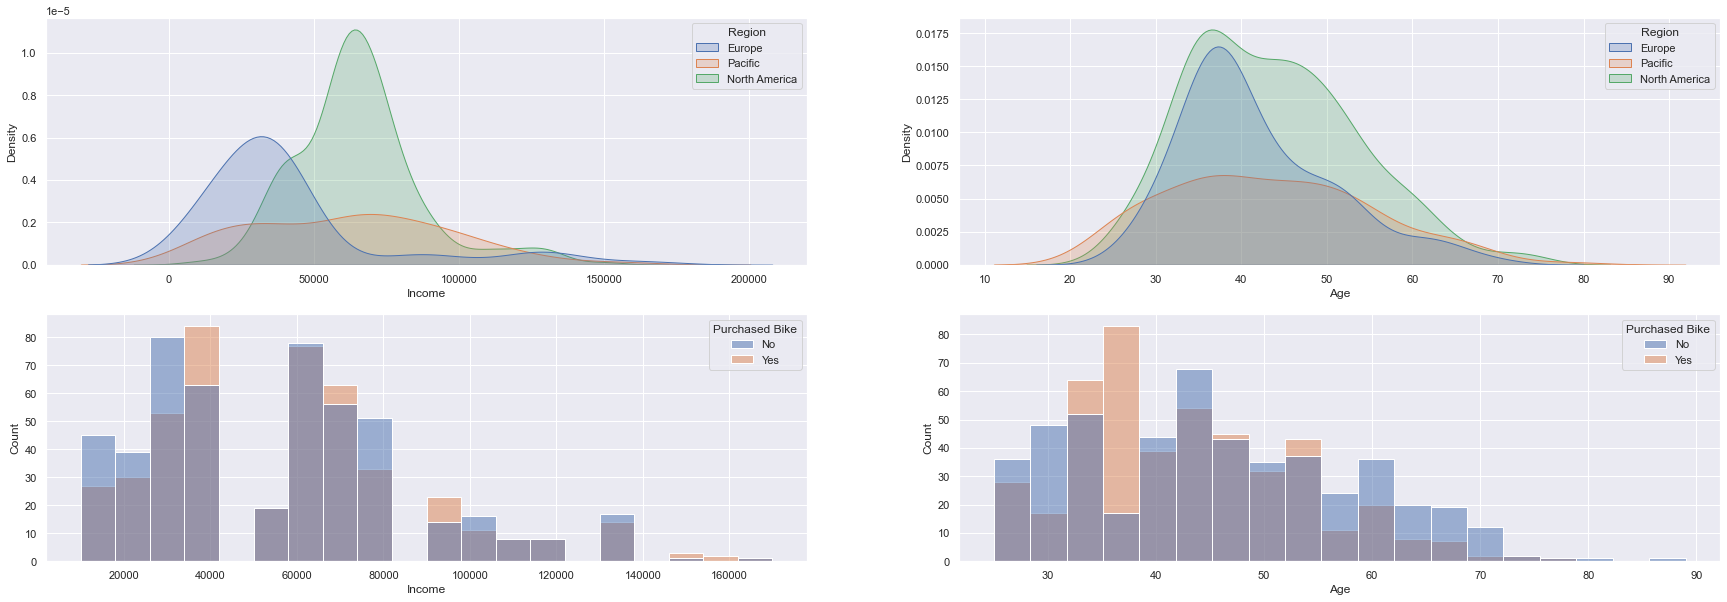

In [128]:
# Using Matplotlib for Subploting
sns.set(rc={"figure.figsize": (30, 10)})
fig, axes = plt.subplots(2, 2)

sns.kdeplot(
    data=df[df["Purchased Bike"] == "Yes"],
    hue="Region",
    x="Income",
    fill=True,
    ax=axes[0, 0],
)
sns.kdeplot(
    data=df[df["Purchased Bike"] == "Yes"],
    x="Age",
    fill=True,
    ax=axes[0, 1],
    color="orange",
    hue="Region",
)
sns.histplot(data=df, x="Income", hue="Purchased Bike", ax=axes[1, 0])
sns.histplot(data=df, x="Age", hue="Purchased Bike", ax=axes[1, 1])

Here we can see that

* <font color='pink'>Income</font> : Between 25k and 75k we got the most Buyers that means People with a middle Revenue, in America where people earn more it looks the same 
* <font color='pink'>Age</font> : The peak here is by adults , that means young people are not so interested, We notice also that between 35 and 38 Peoples buy with a big propability a bike



<font color='cyan'>**Data Wrangling**</font>

* first we will remove ID because it's not important for our classification
* then we will try getting a mapping of our categorical variable to number so that it will be easier to work with them

In [129]:
df = df.copy()

# drop ID
df.drop(columns="ID", inplace=True)

# mapping
a = {"Married": 0, "Single": 1, "No Data": 2}
b = {"Male": 1, "Female": 0, "No Data": 2}
c = {
    "Bachelors": 0,
    "Partial College": 1,
    "High School": 2,
    "Graduate Degree": 3,
    "Partial High School": 4,
}
d = {
    "Professional": 0,
    "Skilled Manual": 1,
    "Clerical": 2,
    "Management": 3,
    "Manual": 4,
}
e = {"Yes": 1, "No": 0, "No Data": 2}
f = {"0-1 Miles": 0, "5-10 Miles": 1, "1-2 Miles": 2, "2-5 Miles": 3, "10+ Miles": 4}
g = {"North America": 0, "Europe": 1, "Pacific": 2}
h = {"Yes": 1, "No": 0}

# Replacing the the values In Dataframe.
df = df.replace({"Marital Status": a})
df = df.replace({"Gender": b})
df = df.replace({"Education": c})
df = df.replace({"Occupation": d})
df = df.replace({"Home Owner": e})
df = df.replace({"Commute Distance": f})
df = df.replace({"Region": g})
df = df.replace({"Purchased Bike": h})

<font color='cyan'>**Train test**</font>

* We will sperate the datas to two new dataset one for test and the oder one for training
* Because we just have 952 Rows its preferable to use 80 % for trainning to get a higher precision for our model

In [130]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "Purchased Bike"]
y = df["Purchased Bike"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

<font color='cyan'>**Modell**</font>

We will use 3 differents modell and find the best for our dataset . All are based from decision tree because we are facing from a decision that the customer should take

* Tree Classifier
* ExtraTreeClassifier (more randomizer classifier)
* RandomForestClassifier


<font color='gray'>Tree Classifier visualization</font>

To better explain what we wanna do let's take a look of a decision tree for our model
Here we will reduce the maximum number of feature to get something simple und understandable .

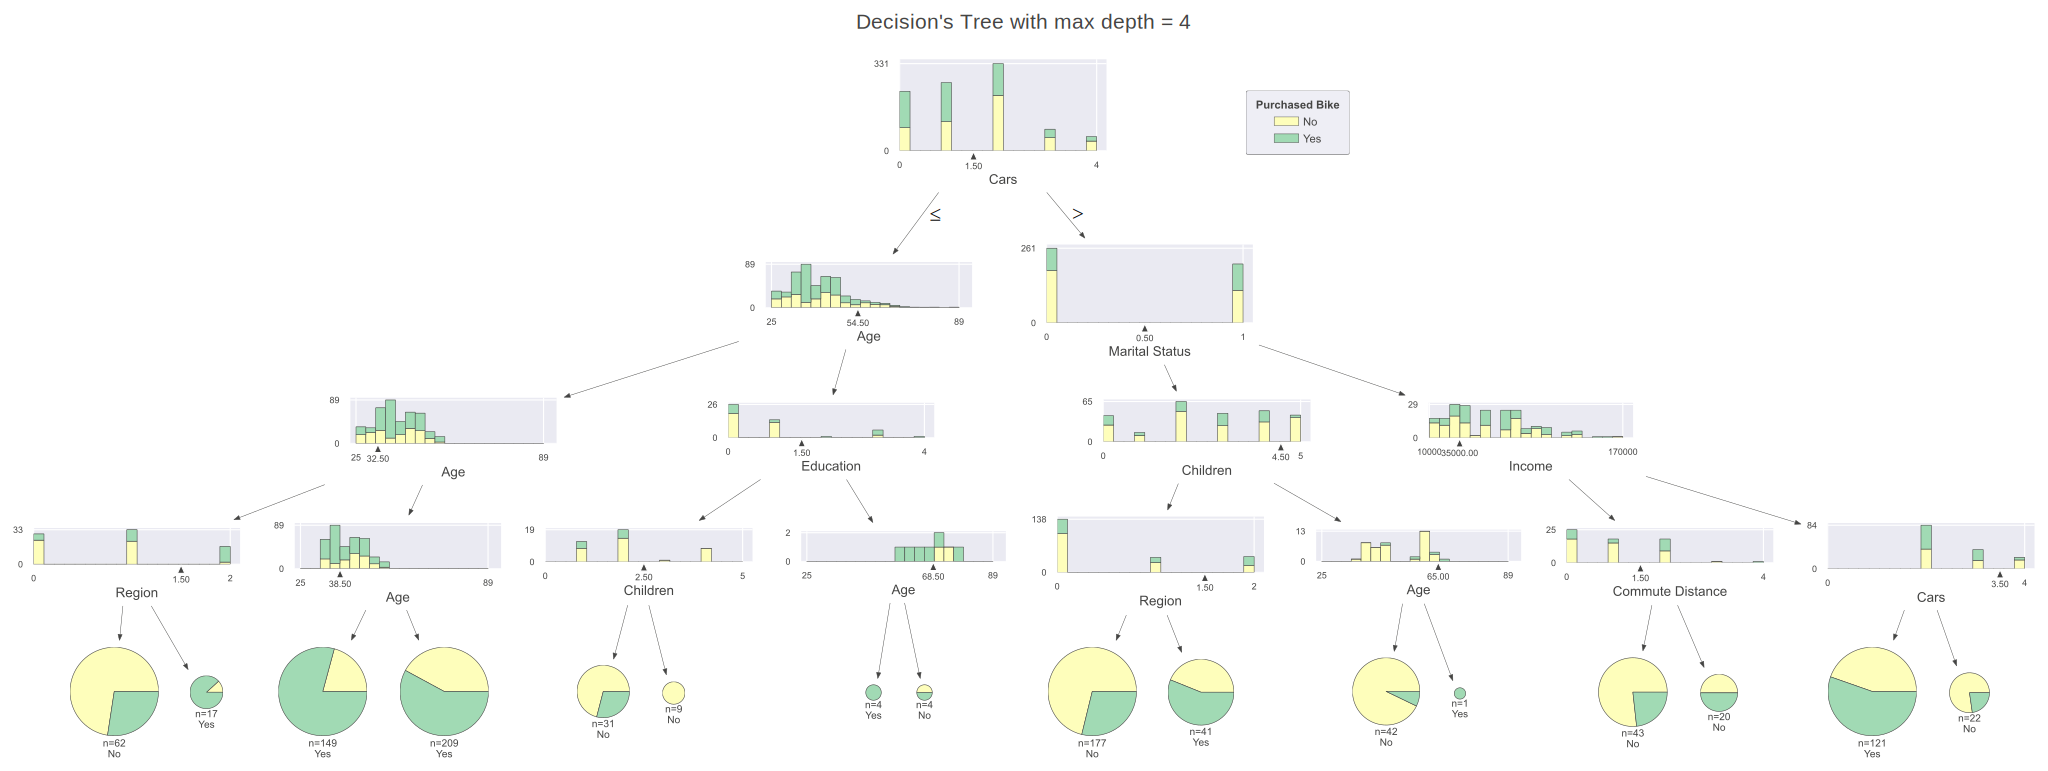

In [131]:
import warnings

from dtreeviz.trees import dtreeviz
from sklearn import metrics, tree

warnings.filterwarnings("ignore")


sns.set(rc={"figure.figsize": (30, 10)})
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

dtreeviz(
    clf,
    X,
    y,
    target_name="Purchased Bike",
    feature_names=clf.feature_names_in_,
    class_names=["No", "Yes"],
    scale=1.6,
    title="Decision's Tree with max depth = 4",
)

Here is our Tree :
At the end we have _leaves_ (16)
Every rectangular plot represents a node (15)

* Firstly we look at the number of cars : if it's lower than 1,5 then we are on node (1 : for the row , 0: for the column) else the node (1,1)
* Now if your age is lower than 54,50 we look at the node (2,1)
* And if your education level is greater than 1,5 we are on node (3,3)
* At the en if your age is lower than 68,5 you will certainly buy with a probability of 1

<font color='cyan'>**Comparaison**</font>

Lets see wich model is the best 

In [132]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


# This function should find with gridsearch the best parameter for our model
def cross_val(model, param):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    return GridSearchCV(model, cv=cv, scoring="f1", param_grid=param)


# This function should generate the best parameters for a model and use it to save some characteristics to evaluate the model and plot also the metrics


def confmatrix(model_, name):
    best_p = model_.best_params_
    print(f"\nBest parameters: {best_p}")
    prediction = model_.predict(X_test)
    f1 = metrics.f1_score(y_test, prediction)
    acc = metrics.accuracy_score(y_test, prediction)
    b_acc = metrics.balanced_accuracy_score(y_test, prediction)
    cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])
    print("Acc on test data: ", round(acc, 5), "\n")
    group_names = [
        "True detected purchaser",
        "False detected non-purchaser",
        "False detected purchaser",
        "True detected non-purchaser",
    ]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", linewidths=2)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    return {
        "Algorithm": name,
        "accuracy": acc,
        "f1_score": f1,
        "balanced_accuracy": b_acc,
        "confusion_matrix": cm,
        "best_hyp": best_p,
    }


<font color='pink'>DecisionTree Classifier</font>

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.


Best parameters: {'criterion': 'entropy', 'max_depth': 41}
Acc on test data:  0.68182 



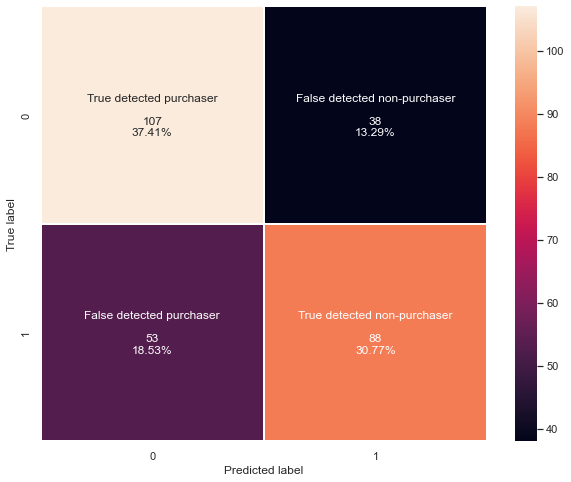

In [133]:
sns.set(rc={"figure.figsize": (10, 8)})
clf_tree = tree.DecisionTreeClassifier()

model_tree = cross_val(
    clf_tree, {"criterion": ["gini", "entropy"], "max_depth": range(1, 50, 2)}
)
model_tree.fit(X_train, y_train)

first = confmatrix(model_tree, "Decision Tree")


<font color='pink'>Random Forest Classifier</font>

* building multiple trees (n_estimators)
* drawing observations with replacement (i.e., a bootstrapped sample)
* splitting nodes on the best split among a random subset of the features selected at every node


Best parameters: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 90}
Acc on test data:  0.70629 



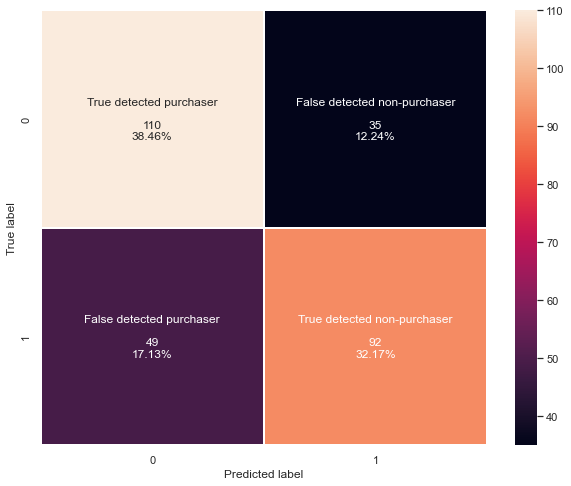

In [134]:
from sklearn import ensemble

rdf = ensemble.RandomForestClassifier()

model_rdf = cross_val(
    rdf,
    {
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt", "log2"],
        "n_estimators": range(10, 100, 10),
        "min_samples_split": [2, 5, 10],
    },
)
model_rdf.fit(X_train, y_train)

second = confmatrix(model_rdf, "Random Forest Tree")


<font color='pink'>ExtraTree Classifier</font>

* builds multiple trees with bootstrap = False by default, which means it samples without replacement
* nodes are split based on random splits among a random subset of the features selected at every node


Best parameters: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 70}
Acc on test data:  0.72378 



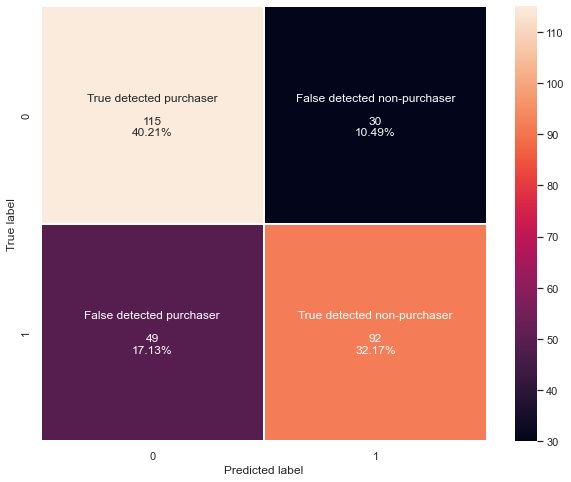

In [135]:
from sklearn import ensemble

clf_tree = ensemble.ExtraTreesClassifier()

model_etree = cross_val(
    clf_tree,
    {
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt", "log2"],
        "n_estimators": range(10, 100, 10),
        "min_samples_split": [2, 5, 10],
    },
)
model_etree.fit(X_train, y_train)

third = confmatrix(model_etree, "Extra Tree")

<font color='cyan'>**Comparaison**</font>

Lets see wich model is the best 

In [136]:
df_eval = pd.DataFrame([first, second, third])
pd.set_option("max_colwidth", 800)

df_eval

,Algorithm,accuracy,f1_score,balanced_accuracy,confusion_matrix,best_hyp
0,Decision Tree,0.681818,0.659176,0.681022,"[[107, 38], [53, 88]]","{'criterion': 'entropy', 'max_depth': 41}"
1,Random Forest Tree,0.706294,0.686567,0.705551,"[[110, 35], [49, 92]]","{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 90}"
2,Extra Tree,0.723776,0.699620,0.722793,"[[115, 30], [49, 92]]","{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 70}"


<font color='cyan'>**Final choice and Observations**</font>

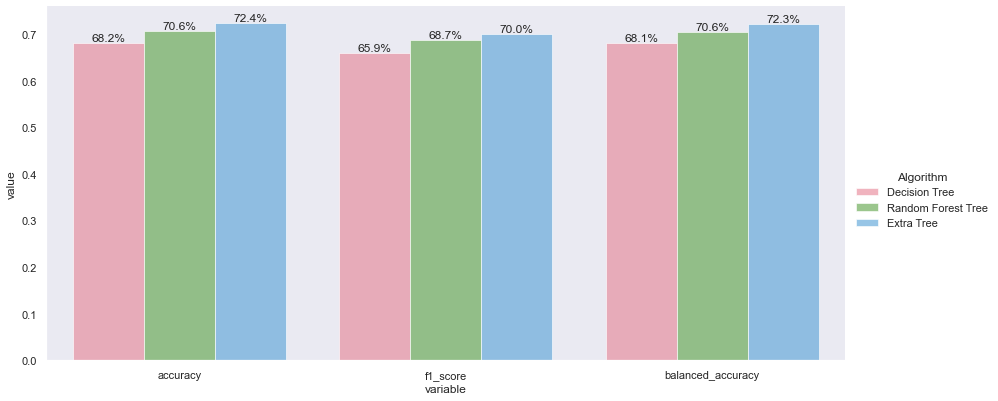

In [137]:
sns.set_style("dark")

ax = sns.catplot(
    data=df_eval.melt(
        id_vars="Algorithm", value_vars=["accuracy", "f1_score", "balanced_accuracy"]
    ),
    kind="bar",
    x="variable",
    y="value",
    hue="Algorithm",
    ci="sd",
    palette="husl",
    alpha=0.6,
    height=6,
)
ax.fig.set_size_inches(15, 7)
ax.fig.subplots_adjust(top=0.81, right=0.86)

a = ax.facet_axis(0, 0)

for c in a.containers:
    labels = [f"{(v.get_height() * 100):.1f}%" for v in c]
    a.bar_label(c, labels=labels, label_type="edge")

The best model is Extra Tree. That means we will test the different choosen groups with this model on differents regions